In [1]:
import pyfits

/Users/belen/opt/anaconda3/lib/python3.8/site-packages/pyfits/__init__.py:21: PyFITSDeprecationWarning: PyFITS is deprecated, please use astropy.io.fits
  warnings.warn('PyFITS is deprecated, please use astropy.io.fits',


In [2]:
hdul = pyfits.open('../../../reduccion/NGC1313/cal/slit1copy_1D001.fits', mode='update')
header = hdul[0].header
header['BUNIT'] = '10**-15 erg/cm2/s/A'
header['FLUXSCAL'] = 1
header
    
hdul.flush()


In [3]:
print(header)

SIMPLE  =                    T / Fits standard                                  BITPIX  =                  -32 / Bits per pixel                                 NAXIS   =                    1 / Number of axes                                 NAXIS1  =                 2234 / Axis length                                    EXTEND  =                    F / File may contain extensions                    ORIGIN  = 'NOAO-IRAF FITS Image Kernel July 2003' / FITS file originator        OBJECT  = 'NGC1313-MSK01 2D CON LACOS' / Name of the object observed            DATE    = '2024-06-17T19:10:30' / Date FITS file was generated                  IRAF-TLM= '2024-06-17T19:10:30' / Time of last modification                     FIXPIX  = 'Jun 14 10:25 Bad pixel file is tmpbpm894khg.pl'                      CTYPE1  = 'LINEAR  '           / R.A. in tangent plane projection               CRPIX1  =                   1. / Ref pix of axis 1                              CRVAL1  =     4024.00463867188 / RA at R

In [4]:
import numpy as np
from astropy.io import fits
import lime 
import matplotlib.pyplot as plt

In [5]:
def import_1313_fits(file_address, ext=0):
    
    #open the fits file
    with fits.open(file_address) as hdul:
        data, header = hdul[ext].data, hdul[ext].header
        
    #reconstruct the wavelength array from the header data
    w_min, dw, n_pix = header["CRVAL1"], header["CD1_1"], header["NAXIS1"]
    w_max = w_min + dw * n_pix
    wavelength = np.linspace(w_min, w_max, n_pix, endpoint=False)
    
    return wavelength, data, header

In [34]:
#now we specify the location and load the data
#address of NGC1313 spectrum (in this case, here)
fits_file = "../../../reduccion/NGC1313/cal/slit1_1D001.fits"

#load the data
wave, flux, hdr = import_1313_fits(fits_file)

In [35]:
# Galaxy redshift and the flux normalization
z_obj = 0.00158
normFlux = 1

In [40]:
gp_spec = lime.Spectrum(wave, flux, redshift=z_obj, norm_flux=normFlux, units_flux='1e-15 erg s^-1 cm^-2 Å^-1')

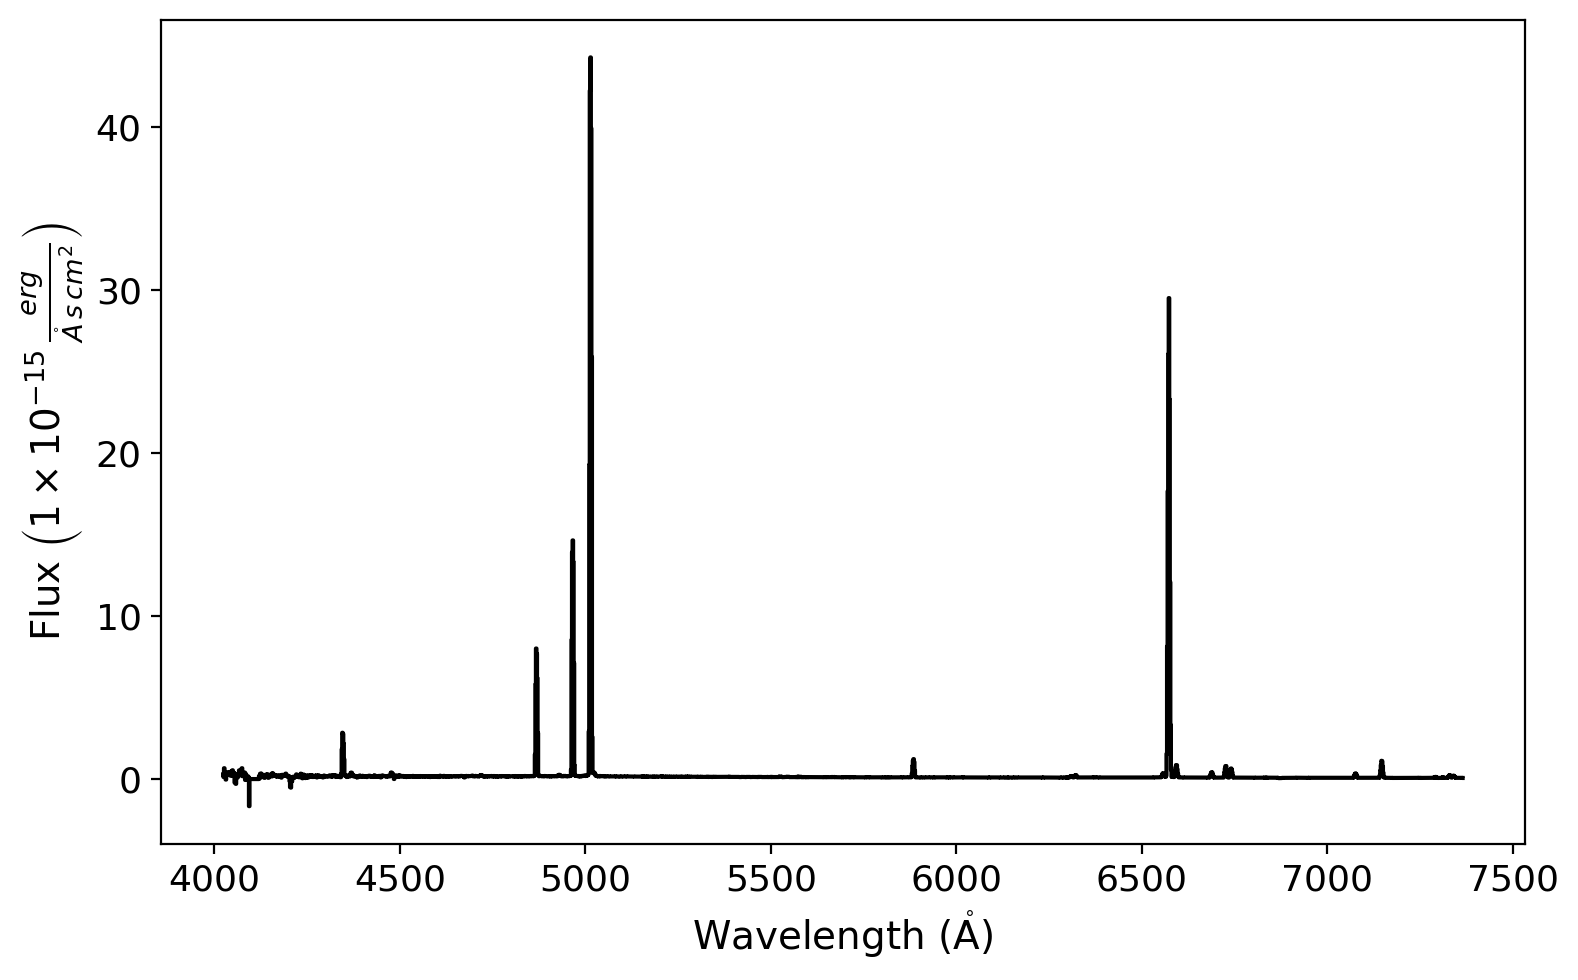

In [41]:
gp_spec.plot.spectrum(label='NGC1313')

In [42]:
gp_spec.fit.bands(6563)

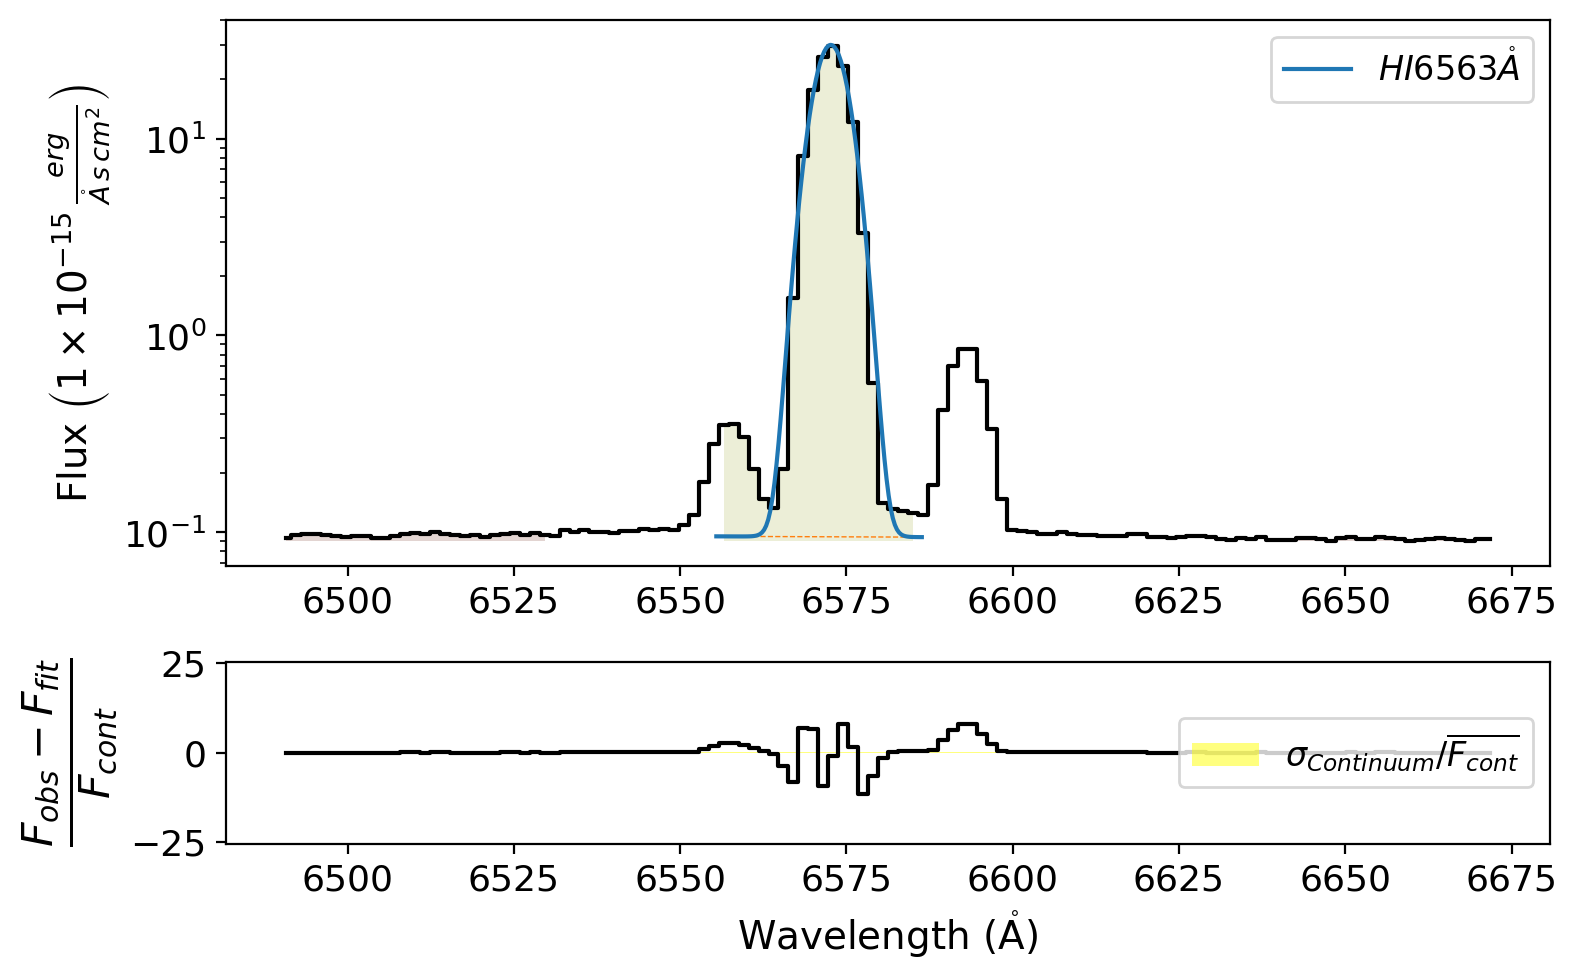

In [43]:
gp_spec.plot.bands()

In [61]:
# Line name and its location mask in the rest _frame
line = 'H1_6563A'
#band_edges = np.array([6438.03, 6508.66, 6535.10, 6600.95, 6627.70, 6661.82])
band_edges = np.array([6438.03, 6508.66, 6535.10, 6600.95, 6627.70, 6661.82])

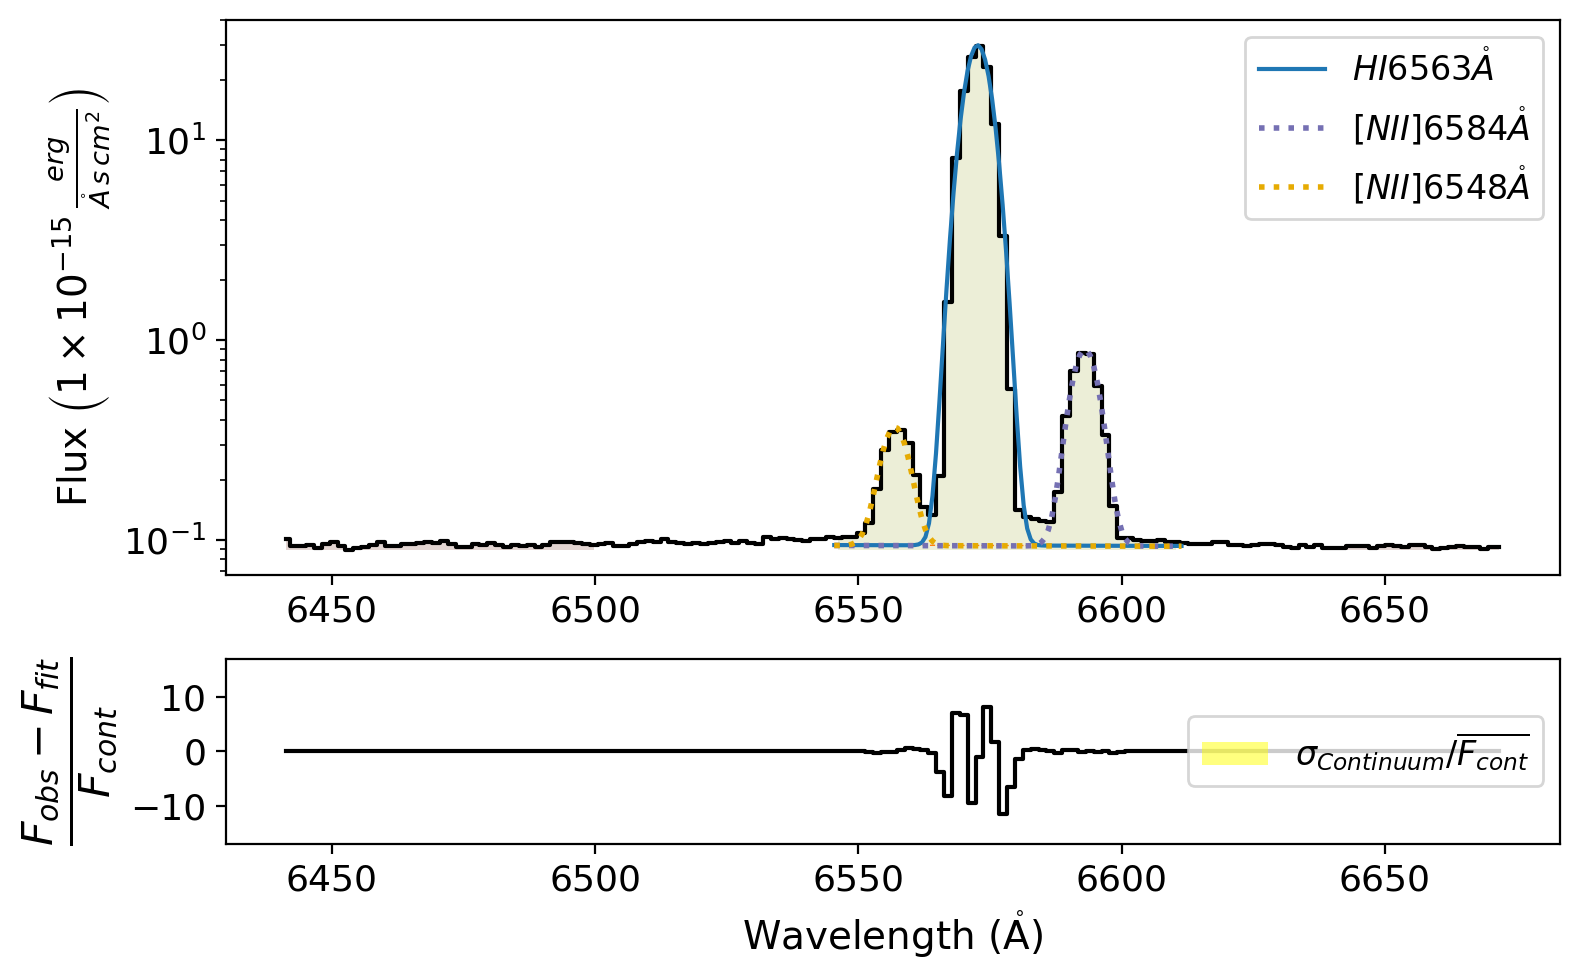

In [62]:
# Run the fitting and plot it
%matplotlib inline
gp_spec.fit.bands(line, band_edges)
gp_spec.plot.bands()

In [48]:
# Fit configuration
line = 'H1_6563A_b'
fit_conf = {'H1_6563A_b': 'H1_6563A+N2_6584A+N2_6548A',
            'N2_6548A_amp': {'expr': 'N2_6584A_amp/2.94'},
            'N2_6548A_kinem': 'N2_6584A'}

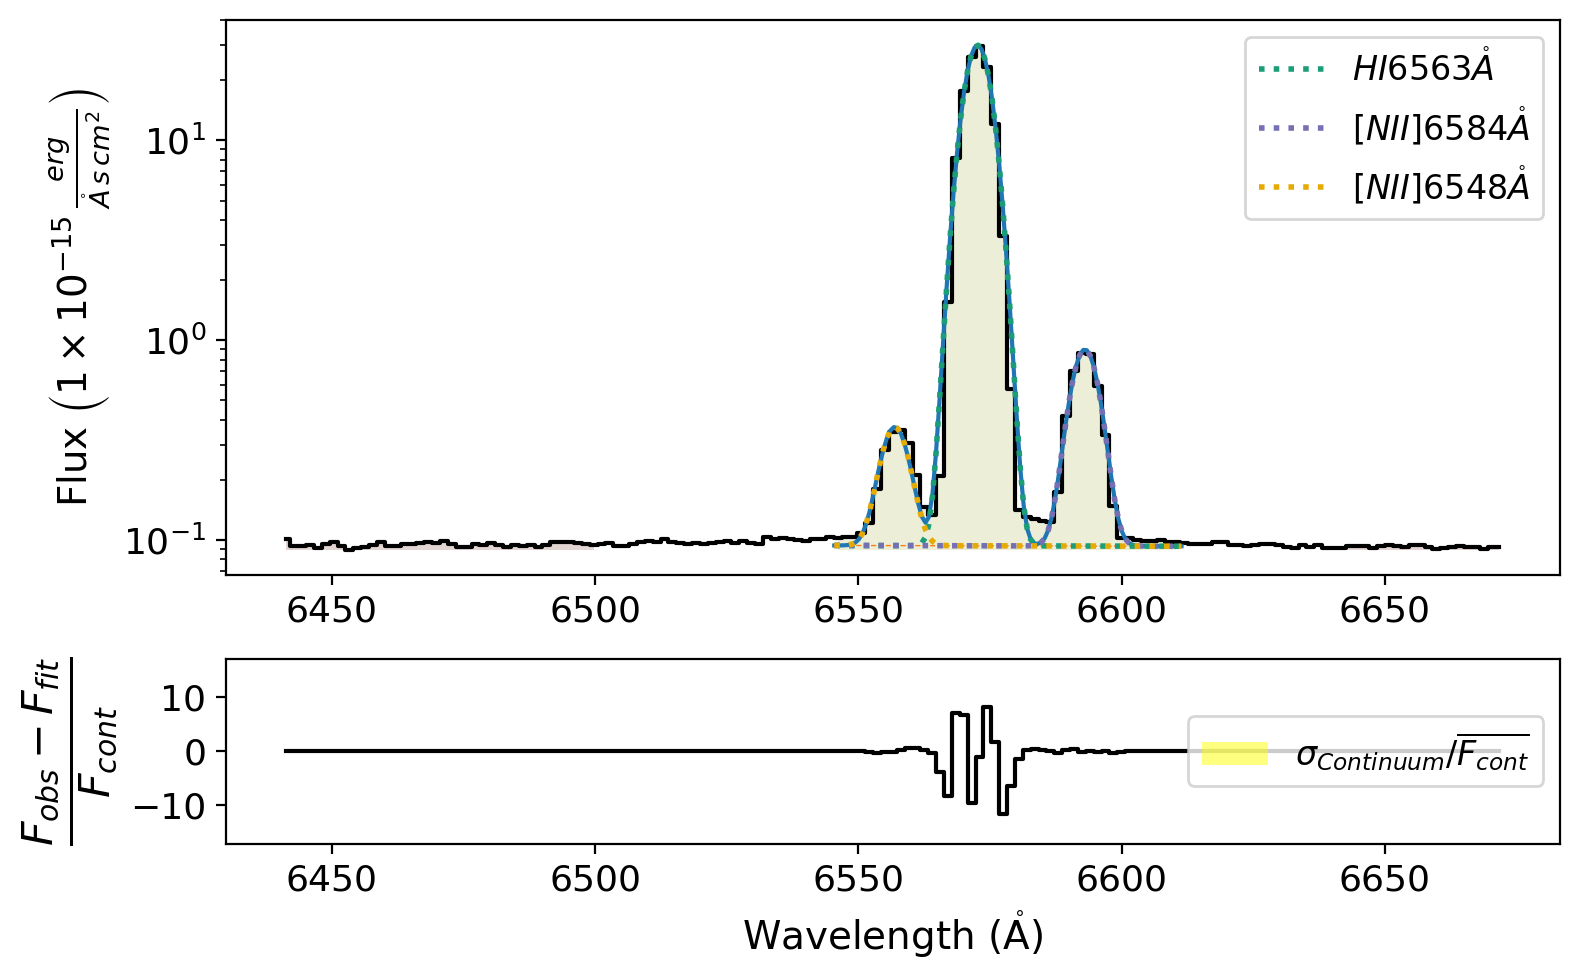

In [49]:
# New attempt including the fit configuration
gp_spec.fit.bands(line, band_edges, fit_conf=fit_conf)
gp_spec.plot.bands()